<img src="./logo_UTN_Guia_2.svg" align="right" width="200" /> 

### Teoría de los Circuitos 2

# Resolucion Guia 2
### Axel Nathanel Nahum

## Introduccion

En este notebook encontraremos la $resolucion$ de la $guia$ $2$ de trabajos practicos, junto a simulaciones y desarrollo en lapiz y papel.

## Ejercicio #4 

<img src="./Ej4.png" align="middle" width="1000" /> 

## Resolucion

In [1]:
from IPython.display import IFrame
IFrame("./Resolucion_Guia_2_EJ4.pdf", width=900, height=1000)

## Verificacion por Python

In [136]:
# Esta parte de código la agregamos SOLO en los notebooks para fijar el estilo de los gráficos.
#
#%%  Inicialización de librerías (esto NO es parte del script demo_seg_orden1.py)
# Setup inline graphics: Esto lo hacemos para que el tamaño de la salida, 
# sea un poco más adecuada al tamaño del jupyter notebook documento

# algún bug cuando lo hice:
plt.figure(1)
plt.close(1)

import matplotlib as mpl

fig_sz_x = 13
fig_sz_y = 7
fig_dpi = 80 # dpi
fig_font_size = 16

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
plt.rcParams.update({'font.size':fig_font_size})

#%%  Fin - Inicialización de librerías

In [137]:
from pytc2.sistemas_lineales import analyze_sys, pretty_print_bicuad_omegayq, tf2sos_analog, pretty_print_SOS

from pytc2.general import print_subtitle

In [213]:
def q_print(cant_q, qq):

    all_sys = []
    filter_names = []
    
    wp = 2 * np.pi * 3500
    ws = 2 * np.pi * 1000
    Ωws = ws/wp

    # Orden del filtro
    nn = 4

    αmax = 1
    e = np.sqrt(10**(αmax/10) - 1) # "epsilon"
    Ωwb = wp * e**(+1/nn)

    for n in range (1 , 9):
     αminn = 10 * np.log10(1 + (e**2 * Ωws**(2*n)))
    # print(αminn)

    Z,P,K = sig.buttap(nn)
    Num,Den = sig.zpk2tf(Z,P,K)
    Num_mp,Den_mp = sig.lp2hp(Num, Den, e**(+1/nn))

    TF = TransferFunction(Num_mp, Den_mp)
   
    this_label = 'q' + str(cant_q[0]) + ' = ' + str(round(qq[0], 4)) + '\n \n' + 'q' + str(cant_q[1]) + ' = ' + str(round(qq[1], 4))

    filter_names.append(this_label)
        
    analyze_sys(TF, filter_names)

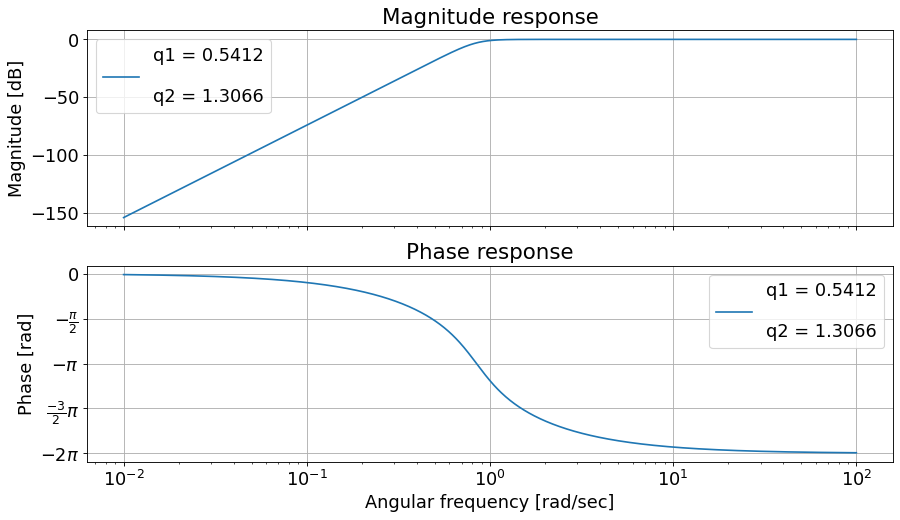

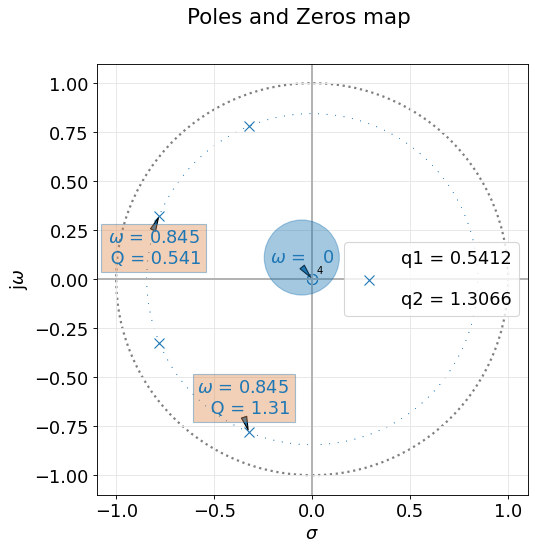

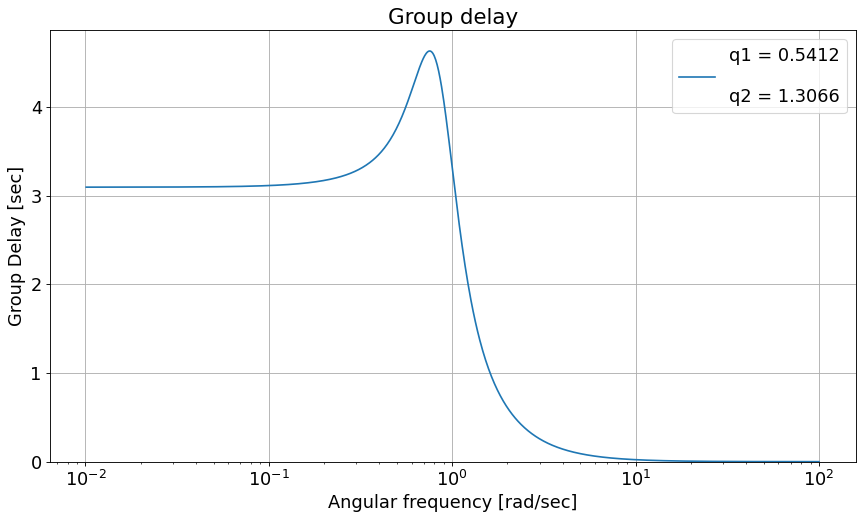

In [214]:
import numpy as np

cant_q = [1, 2]

qq1 = 1/(2 * np.cos(np.pi/8))
qq2 = 1/(2 * np.cos(3 * np.pi/8))

qq = [qq1, qq2]

q_print(cant_q, qq)

En estos graficos podremos observar y analizar la $respuesta$ $en$ $frecuencia$ $normalizada$ en un $\omega_0$ de $0.845$ (este valor corresponde a hacer $ε^{(+1/n)}$, siendo n = 4. Esto debido a que se trata de un filtro $Pasa-Altos$), ademas de observar los polos y ceros de la transferencia calculada previamente. En este caso se observa un filtro $Pasa-Altos$ de maxima planicidad con polos ubicados en $\frac{\pi}{8}$ y $\frac{3 \pi}{8}$ ($Angulos$ en donde se encuentran los polos. Los valores se pueden hayar a partir del $\omega_0$ y del angulo, usando las funciones trigonometricas del coseno y seno) y un $cero$ $triple$ en el origen.

$La$ $transferencia$ $asociada$ $a$ $estos$ $graficos$ $es:$

$$ T(s) = \frac{V_2}{V_1} = \frac{S^2}{s^2 + s. \frac{\omega_0}{Q} + \omega_0^2} * \frac{S}{s + \omega_0}$$

$Donde:$

* $\omega_0 = 0.845$, $Q1 = 0,5412$ y $Q2 = 1,3066$. Esto es corresponde a una $transferencia$ $normalizada$.

En esta se puede observar claramente dos filtros $Pasa-Altos$ en $cascada$, dos de segundo orden. Esta transferencia se encuentra normalizada en $w_0 = 0.845$ pero se podria desnormalizar teniendo en cuenta otra S distinta. Esta seria igual a $\frac{Sn}{Ω\omega}$, donde Sn (domino de S normalizado) y Ω$\omega$ (norma de normalizacion de frecuencia). 

$Esta$ $nueva$ $transferencia$ $quedaria:$

$$ T(s) = \frac{V_2}{V_1} = \frac{S^2}{s^2 + s. \frac{Ω\omega_0}{Q} + Ω\omega_0^2} * \frac{S}{s + Ω\omega_0}$$

$Donde:$

* $Ω\omega_0 = 2 * \pi * 3500Hz * e^\frac{1}{4}$
* $e^\frac{1}{4} = 0.8445$

Esta ultima sera representada por el grafico proximo de LTspice.

## Circuito LTspice

<img src="./Circuito_Guia_2_Ej4.PNG" align="middle" width="1050" /> 

## Respuesta en frecuencia LTspice

<img src="./Respuesta_Frecuencia_Guia_2_Ej4.PNG" align="middle" width="1000" /> 


## Plantilla

<img src="./Plantilla_Ej4.PNG" align="center" width="600" /> 

El el grafico de LTspice se observa la $respuesta$ $en$ $frecuencia$ $de$ $un$ $filtro$ $Pasa-Altos$ de $maxima$ $planicidad$ calculado previamente. En este se puede ver como se verifica que a $1KHz$, la $atenuacion$ es de $37$ $dB$ aproximadamente. Aca se verifica lo pedido por la plantilla. A su vez, tambien se verifica lo calculado en los $PDFS$. Ademas, en una frecuencia de aproximadamente $3,5KHz$, la atenuacion es de $1 dB$, cumpliendose aproximadamente lo pedido por la $plantilla$. Ademas se observa claramente como la fase empieza en 0 y termina en -360, corfimando lo analizado anteriormente con los graficos de Python.